## **네이버 데이터랩 쇼핑 인사이트를 통해 버즈량 확인**

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager 
import plotly.express as px
import seaborn as sns
import urllib.request
import requests
import json
import cv2 as cv
import warnings

warnings.filterwarnings(action='ignore')
# from fbprophet import Prophet

### 연령별 가구당 월평균 가계수지
![그래프](../../OneDrive/%EB%B0%94%ED%83%95%20%ED%99%94%EB%A9%B4/%EC%9B%94%ED%8F%89%EA%B7%A0%20%EA%B0%80%EA%B3%84%EC%88%98%EC%A7%80%20%EA%B7%B8%EB%9E%98%ED%94%84.png)

## API 활용

In [148]:
# API 호출 인증 정보
client_id = "YOUR_CLIENT_ID" 
client_secret = "YOUR_CLIENT_SECRET" 

# API 요청 URL 및 파라미터 설정
url = "https://openapi.naver.com/v1/datalab/shopping/categories"
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret
}
# 과거 데이터와 계절성 동일 / 가장 최근 데이터로 마케팅 분석

data = {
    "startDate": "2022-08-01",
    "endDate": "2023-03-31",
    "timeUnit": "month",
    "category": [
        {"name": "패션의류", "param": ["50000000"]},
        {'name': "식품", 'param': ["50000006"]},
        {"name": "여가/생활편의", "param": ["50000009"]},
    ],
    "ages": [ "30",  "40"]
}


response = requests.post(url, headers=headers, json=data)
result = response.json()
result


{'startDate': '2022-08-01',
 'endDate': '2023-03-31',
 'timeUnit': 'month',
 'results': [{'title': '패션의류',
   'category': ['50000000'],
   'data': [{'period': '2022-08-01', 'ratio': 63.46487},
    {'period': '2022-09-01', 'ratio': 72.93996},
    {'period': '2022-10-01', 'ratio': 100},
    {'period': '2022-11-01', 'ratio': 96.67538},
    {'period': '2022-12-01', 'ratio': 98.12708},
    {'period': '2023-01-01', 'ratio': 73.20924},
    {'period': '2023-02-01', 'ratio': 71.63262},
    {'period': '2023-03-01', 'ratio': 85.90598}]},
  {'title': '식품',
   'category': ['50000006'],
   'data': [{'period': '2022-08-01', 'ratio': 48.56081},
    {'period': '2022-09-01', 'ratio': 41.77368},
    {'period': '2022-10-01', 'ratio': 45.79115},
    {'period': '2022-11-01', 'ratio': 51.7236},
    {'period': '2022-12-01', 'ratio': 53.96776},
    {'period': '2023-01-01', 'ratio': 50.68882},
    {'period': '2023-02-01', 'ratio': 43.72885},
    {'period': '2023-03-01', 'ratio': 49.63162}]},
  {'title': '여가/생활편

In [149]:
# 각 데이터 title 별로 ratio 데이터 프레임 생성
df = pd.DataFrame(result['results'][0]['data'])[['period']]
for i in range(3):
    tmp = pd.DataFrame(result['results'][i]['data'])
    tmp = tmp.rename(columns={'ratio': result['results'][i]['title']})
    df = pd.merge(df, tmp, how = 'left', on=['period'])
df['period'] = pd.to_datetime(df['period'])
df

,period,패션의류,식품,여가/생활편의
0,2022-08-01,63.46487,48.56081,8.81942
1,2022-09-01,72.93996,41.77368,6.64661
2,2022-10-01,100.00000,45.79115,7.33500
3,2022-11-01,96.67538,51.72360,7.27901
4,2022-12-01,98.12708,53.96776,8.41500
5,2023-01-01,73.20924,50.68882,9.42964
6,2023-02-01,71.63262,43.72885,9.11109
7,2023-03-01,85.90598,49.63162,8.36093


In [150]:
# 폰트가 적용되지 않아 영문으로 title 변경
df = df.rename(columns={'패션의류':'Fashion_Clothes','식품':'Food','여가/생활편의':'leisure'})
df

,period,Fashion_Clothes,Food,leisure
0,2022-08-01,63.46487,48.56081,8.81942
1,2022-09-01,72.93996,41.77368,6.64661
2,2022-10-01,100.00000,45.79115,7.33500
3,2022-11-01,96.67538,51.72360,7.27901
4,2022-12-01,98.12708,53.96776,8.41500
5,2023-01-01,73.20924,50.68882,9.42964
6,2023-02-01,71.63262,43.72885,9.11109
7,2023-03-01,85.90598,49.63162,8.36093


findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font family 'NanumBarunpen' not found.
findfont: Font famil

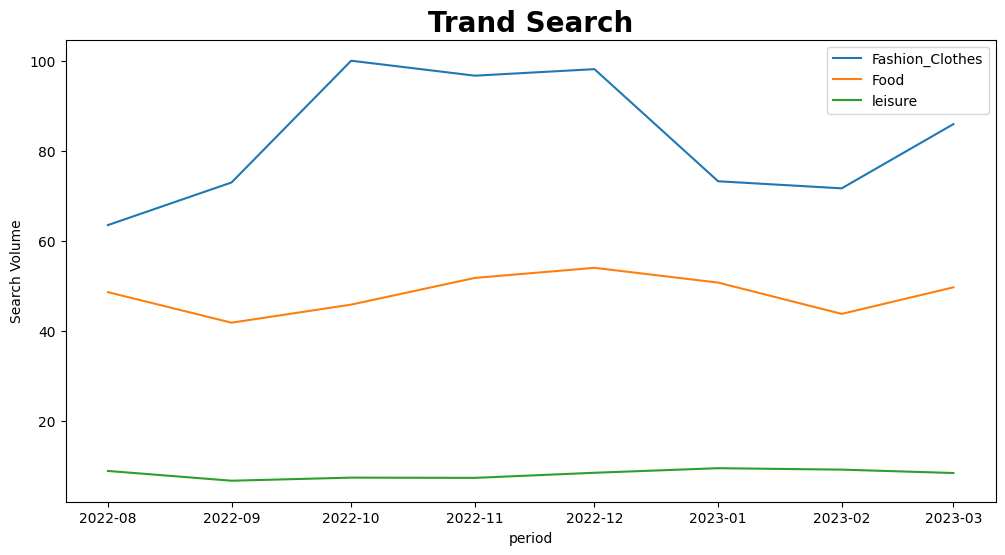

In [151]:
# colunm 순서
columns = df.columns[1:]
len_col = len(columns)

# 그래프 크기 생성
fig = plt.figure(figsize=(12, 6))
plt.title('Trand Search', size=20, weight = 'bold')

# 칼럼 길이 만큼 그래프  생성 
for i in range(len_col):
    sns.lineplot(x = df['period'], y = df[columns[i]], label = columns[i])
plt.ylabel('Search Volume')
plt.legend(loc = 'upper right')
plt.show()